In [210]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import phik


from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from xgboost import XGBClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV
)

from sklearn.preprocessing import(
     StandardScaler,
     MinMaxScaler,
     OneHotEncoder,
     PolynomialFeatures,
     OrdinalEncoder
)

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    f1_score,
    confusion_matrix,
    recall_score,
    precision_score,
    accuracy_score
)

from sklearn.feature_selection import (
    SelectKBest,
    RFE
)

import joblib

sns.set(style="darkgrid", font_scale=1.4)

RANDOM_STATE = 42

In [211]:
def basic_statistics(y_test,y_pred):
    print(f"f1 = {f1_score(y_test,y_pred)}")
    print(f"recall = {recall_score(y_test,y_pred)}")
    print(f"precision = {precision_score(y_test, y_pred)}")
    print(f"accuracy = {accuracy_score(y_test,y_pred)}")

# Загрузка данных

In [212]:
data = pd.read_csv("heart_train.csv")

In [213]:
data.head()

Unnamed: 0       Age  Cholesterol  Heart rate  Diabetes  Family History  \
0           0  0.359551     0.732143    0.074244       1.0             1.0   
1           1  0.202247     0.325000    0.047663       1.0             1.0   
2           2  0.606742     0.860714    0.055912       1.0             0.0   
3           3  0.730337     0.007143    0.053162       0.0             0.0   
4           4  0.775281     0.757143    0.021998       0.0             0.0   

   Smoking  Obesity  Alcohol Consumption  Exercise Hours Per Week  ...  \
0      1.0      1.0                  1.0                 0.535505  ...   
1      0.0      0.0                  1.0                 0.068690  ...   
2      1.0      1.0                  1.0                 0.944001  ...   
3      1.0      0.0                  1.0                 0.697023  ...   
4      1.0      0.0                  1.0                 0.412878  ...   

   Physical Activity Days Per Week  Sleep Hours Per Day  \
0                              3.0             0.333333   
1                              3.0             0.833333   
2                              2.0             1.000000   
3                              0.0             0.333333   
4                              5.0             1.000000   

   Heart Attack Risk (Binary)  Blood sugar     CK-MB  Troponin  Gender  \
0                         0.0     0.227018  0.048229  0.036512    Male   
1                         0.0     0.150198  0.017616  0.000194  Female   
2                         0.0     0.227018  0.048229  0.036512  Female   
3                         1.0     0.227018  0.048229  0.036512  Female   
4                         1.0     0.227018  0.048229  0.036512    Male   

   Systolic blood pressure  Diastolic blood pressure    id  
0                 0.212903                  0.709302  2664  
1                 0.412903                  0.569767  9287  
2                 0.238710                  0.220930  5379  
3                 0.348387                  0.267442  8222  
4                 0.619355                  0.441860  4047  

[5 rows x 28 columns]

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8685 entries, 0 to 8684
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       8685 non-null   int64  
 1   Age                              8685 non-null   float64
 2   Cholesterol                      8685 non-null   float64
 3   Heart rate                       8685 non-null   float64
 4   Diabetes                         8442 non-null   float64
 5   Family History                   8442 non-null   float64
 6   Smoking                          8442 non-null   float64
 7   Obesity                          8442 non-null   float64
 8   Alcohol Consumption              8442 non-null   float64
 9   Exercise Hours Per Week          8685 non-null   float64
 10  Diet                             8685 non-null   int64  
 11  Previous Heart Problems          8442 non-null   float64
 12  Medication Use      

In [215]:
data.isna().sum()

Unnamed: 0                           0
Age                                  0
Cholesterol                          0
Heart rate                           0
Diabetes                           243
Family History                     243
Smoking                            243
Obesity                            243
Alcohol Consumption                243
Exercise Hours Per Week              0
Diet                                 0
Previous Heart Problems            243
Medication Use                     243
Stress Level                       243
Sedentary Hours Per Day              0
Income                               0
BMI                                  0
Triglycerides                        0
Physical Activity Days Per Week    243
Sleep Hours Per Day                  0
Heart Attack Risk (Binary)           0
Blood sugar                          0
CK-MB                                0
Troponin                             0
Gender                               0
Systolic blood pressure  

# Предобработка данных 

In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8685 entries, 0 to 8684
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       8685 non-null   int64  
 1   Age                              8685 non-null   float64
 2   Cholesterol                      8685 non-null   float64
 3   Heart rate                       8685 non-null   float64
 4   Diabetes                         8442 non-null   float64
 5   Family History                   8442 non-null   float64
 6   Smoking                          8442 non-null   float64
 7   Obesity                          8442 non-null   float64
 8   Alcohol Consumption              8442 non-null   float64
 9   Exercise Hours Per Week          8685 non-null   float64
 10  Diet                             8685 non-null   int64  
 11  Previous Heart Problems          8442 non-null   float64
 12  Medication Use      

In [217]:
data.isna().sum()

Unnamed: 0                           0
Age                                  0
Cholesterol                          0
Heart rate                           0
Diabetes                           243
Family History                     243
Smoking                            243
Obesity                            243
Alcohol Consumption                243
Exercise Hours Per Week              0
Diet                                 0
Previous Heart Problems            243
Medication Use                     243
Stress Level                       243
Sedentary Hours Per Day              0
Income                               0
BMI                                  0
Triglycerides                        0
Physical Activity Days Per Week    243
Sleep Hours Per Day                  0
Heart Attack Risk (Binary)           0
Blood sugar                          0
CK-MB                                0
Troponin                             0
Gender                               0
Systolic blood pressure  

* Проверим на дубликаты

In [218]:
data.duplicated().sum()

np.int64(0)

* Обычных дубликатов нет, проверим на наличие неявных дубликатов

In [219]:
def implicit_duplicates(data):
    for column in data.columns:
        if data[column].dtype == "object":
            print(data[column].unique())


In [220]:
implicit_duplicates(data)

['Male' 'Female' '1.0' '0.0']


* Заполнение пропусков в датасете будет выполнено нулевыми значениями, потому что в бинарных переменных пропуски логически соответствуют отсутствию признака (0), а в остальных числовых столбцах пропуски с высокой вероятностью означают нулевое значение показателя.

In [221]:
data = data.fillna(0)

In [222]:
data.nunique()

Unnamed: 0                         8685
Age                                  77
Cholesterol                         282
Heart rate                           87
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            7933
Diet                                  4
Previous Heart Problems               2
Medication Use                        2
Stress Level                         11
Sedentary Hours Per Day            7933
Income                             7808
BMI                                7933
Triglycerides                       772
Physical Activity Days Per Week       8
Sleep Hours Per Day                   8
Heart Attack Risk (Binary)            2
Blood sugar                         239
CK-MB                               679
Troponin                            340
Gender                                4


In [223]:
data["Gender"].unique()

array(['Male', 'Female', '1.0', '0.0'], dtype=object)

* В столбце Gender встречаются четыре типа значений: Male, Female, 1.0 и 0.0. Поскольку числовые значения 1.0 и 0.0 не имеют однозначной интерпретации (неизвестно, какому полу они соответствуют), их следует удалить из данных, чтобы сохранить только корректные категории — Male и Female.

In [224]:
#data["Gender"] = data["Gender"].str.replace("Male","1.0").str.replace("Female","0.0")

In [225]:
data = data.query('Gender != "1.0" and Gender != "0.0"')

* Преобразуем Stress Level, Physical Activity Days Per Week, Sleep Hours Per Day в строковый тип

In [226]:
data["Stress Level"].unique()

array([ 8.,  9.,  6.,  3.,  7.,  1., 10.,  2.,  5.,  4.])

In [227]:
#def transform_stress_level(data):
#    if data<5:
#        return "Low"
#    elif 5 <= data < 8:
#        return "Average"
#    else:
#        return "High"

#data["Stress Level"] = data["Stress Level"].apply(transform_stress_level)


In [228]:
#def transform_physical_activity_days_per_week(data):
#    if data<3:
#        return "Little"
#    elif 3 <= data < 6:
#        return "Average"
#    else:
#        return "High"

#data["Physical Activity Days Per Week"] = data["Physical Activity Days Per Week"].apply(transform_physical_activity_days_per_week)

In [229]:
#def transform_sleep_hours_per_day(data):
#    if data<0.5:
#        return "Little"
#    elif 0.5 <= data < 0.83333333:
#        return "Average"
#    else:
#        return "High"

#data["Sleep Hours Per Day"] = data["Sleep Hours Per Day"].apply(transform_sleep_hours_per_day)

* Преобразуем некоторые столбцы в строковый тип

In [230]:
data[[
    "Medication Use",
    "Previous Heart Problems",
    "Diet",
    "Alcohol Consumption",
    "Obesity",
    "Smoking",
    "Family History",
    "Diabetes"
    ]] = data[[
                        "Medication Use",
                        "Previous Heart Problems",
                        "Diet",
                        "Alcohol Consumption",
                        "Obesity",
                        "Smoking",
                        "Family History",
                        "Diabetes"]].astype("str")

In [231]:
data["Sleep Hours Per Day"] = round(data["Sleep Hours Per Day"],2)

### Краткий вывод по предобработке данных:

* Мы изучили дынные
* Проверили на явные и неявные дубликаты
* Обработали пропуски
* Преобразовали некоторые столбцы к нужному типу

# EDA

In [232]:
def plot_histogram(data, name_columns, n_cols=2, bins=30):
    n_rows = (len(name_columns) + n_cols - 1) // n_cols  

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
    axes = axes.flatten()  

    for ax, col in zip(axes, name_columns):
        sns.histplot(data=data, x=col, bins=bins, kde=True, ax=ax)
        ax.axvline(data[col].median(), ls="--",color="red",label=f"Медиана = {round(data[col].median(),2)}")
        ax.legend()
        ax.set_title(col)

    for ax in axes[len(name_columns):]:
        fig.delaxes(ax)
    

    plt.tight_layout()
    plt.show()


def plot_bars(data, name_columns, n_cols=2, edgecolor='black', linewidth=1.0):

    n_rows = (len(name_columns) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
    axes = axes.flatten()
    
    for ax, col in zip(axes, name_columns):
        data[col].value_counts(ascending=False).plot(kind='bar', ax=ax, edgecolor=edgecolor, linewidth=linewidth)
        ax.set_title(f"Распределение: {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("Количество")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=360, ha='right')
    
      
    for ax in axes[len(name_columns):]:
        fig.delaxes(ax)
    
    plt.tight_layout()
    plt.show()
    


### Построим гистограммы для количественных переменных

### 

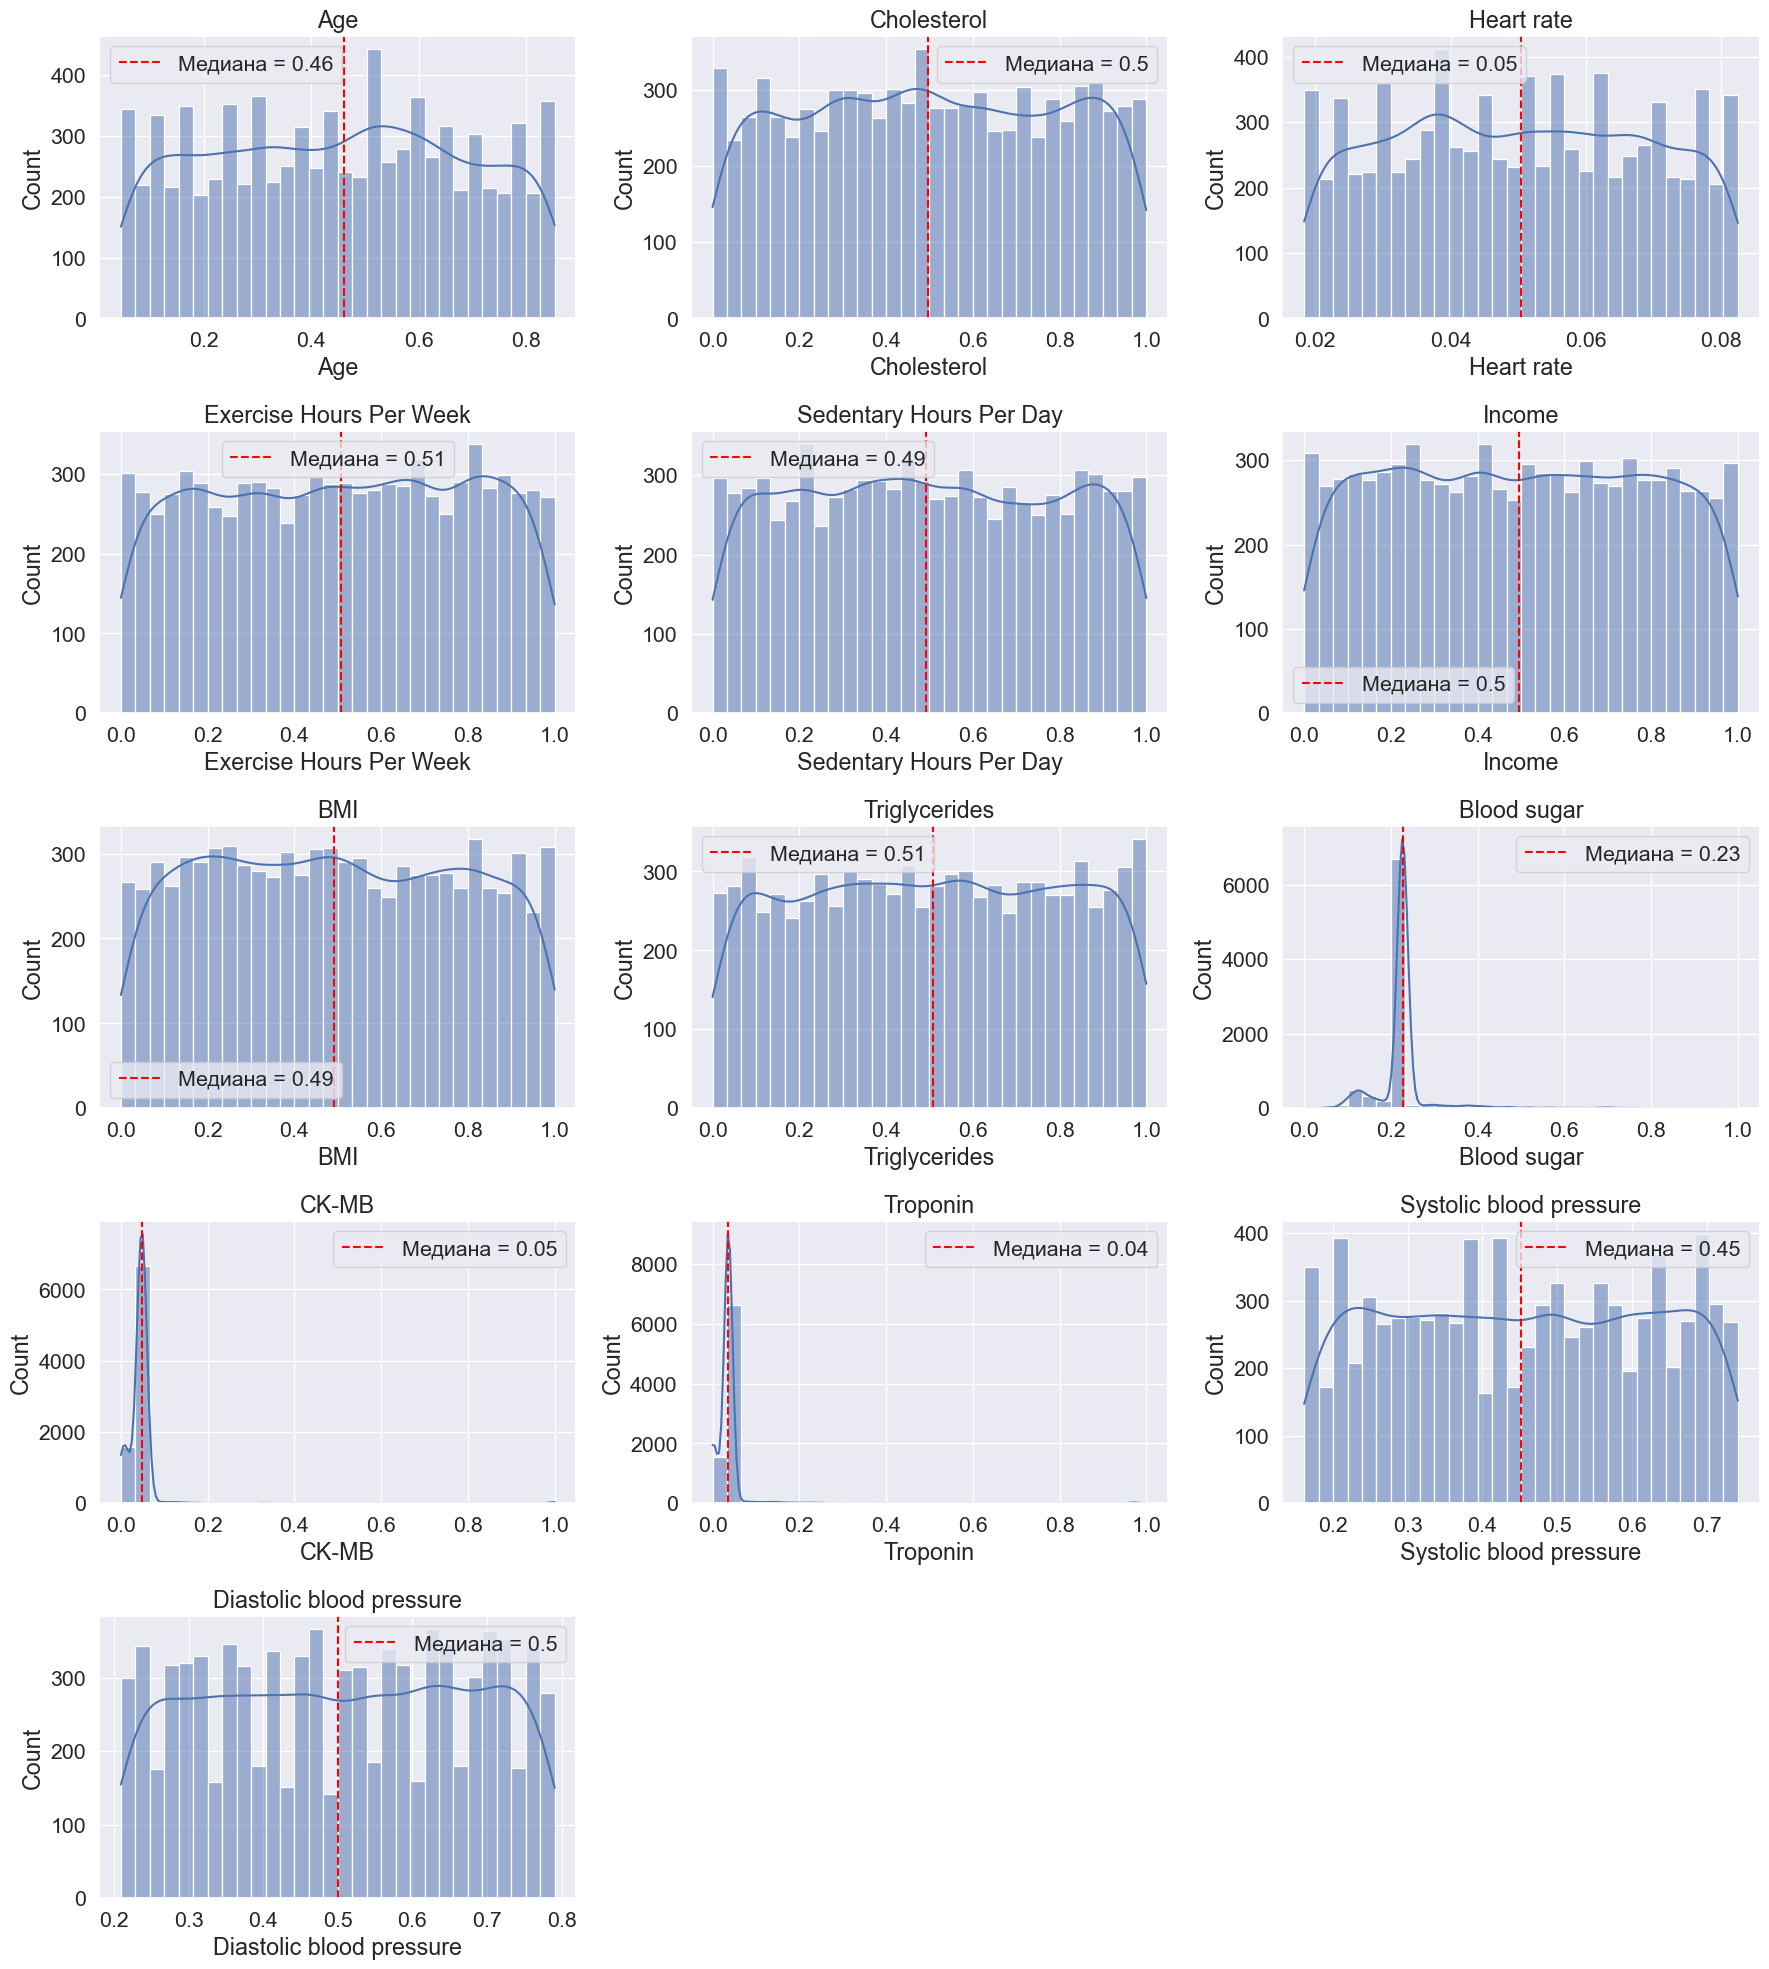

In [233]:
name_columns = [
    'Age',
    'Cholesterol',
    'Heart rate',
    'Exercise Hours Per Week',
    'Sedentary Hours Per Day',
    'Income',
    'BMI',
    'Triglycerides',
    'Blood sugar',
    'CK-MB',
    'Troponin',
    'Systolic blood pressure',
    'Diastolic blood pressure'
    ]


plot_histogram(data, name_columns, n_cols = 3)





* Большинство признаков в датасете, кроме  CK-MB и Troponin, не содержат существенной интересной информации. Исследования показывают, что повышение уровня тропонина и/или повышение уровня CK-MB (выход за нормальные значения) однозначно связано с повреждением сердечной мышцы и может свидетельствовать о наличии инфаркта. Поскольку эти признаки напрямую отражают проявление целевого события — риска инфаркта — включение их в модель может привести к утечке целевого признака. Поэтому целесообразно удалить их из набора данных перед построением модели.

* Также стоит отметить, что повышение уровня глюкозы в крови связано с увеличением риска сердечно-сосудистых заболеваний. Поэтому признак “Blood sugar” может давать модели информацию, близкую к целевому событию, и его целесообразно исключить из набора данных.

In [234]:
data = data.drop(columns=["CK-MB","Troponin"])

### Построим bar_plots для качественных переменных

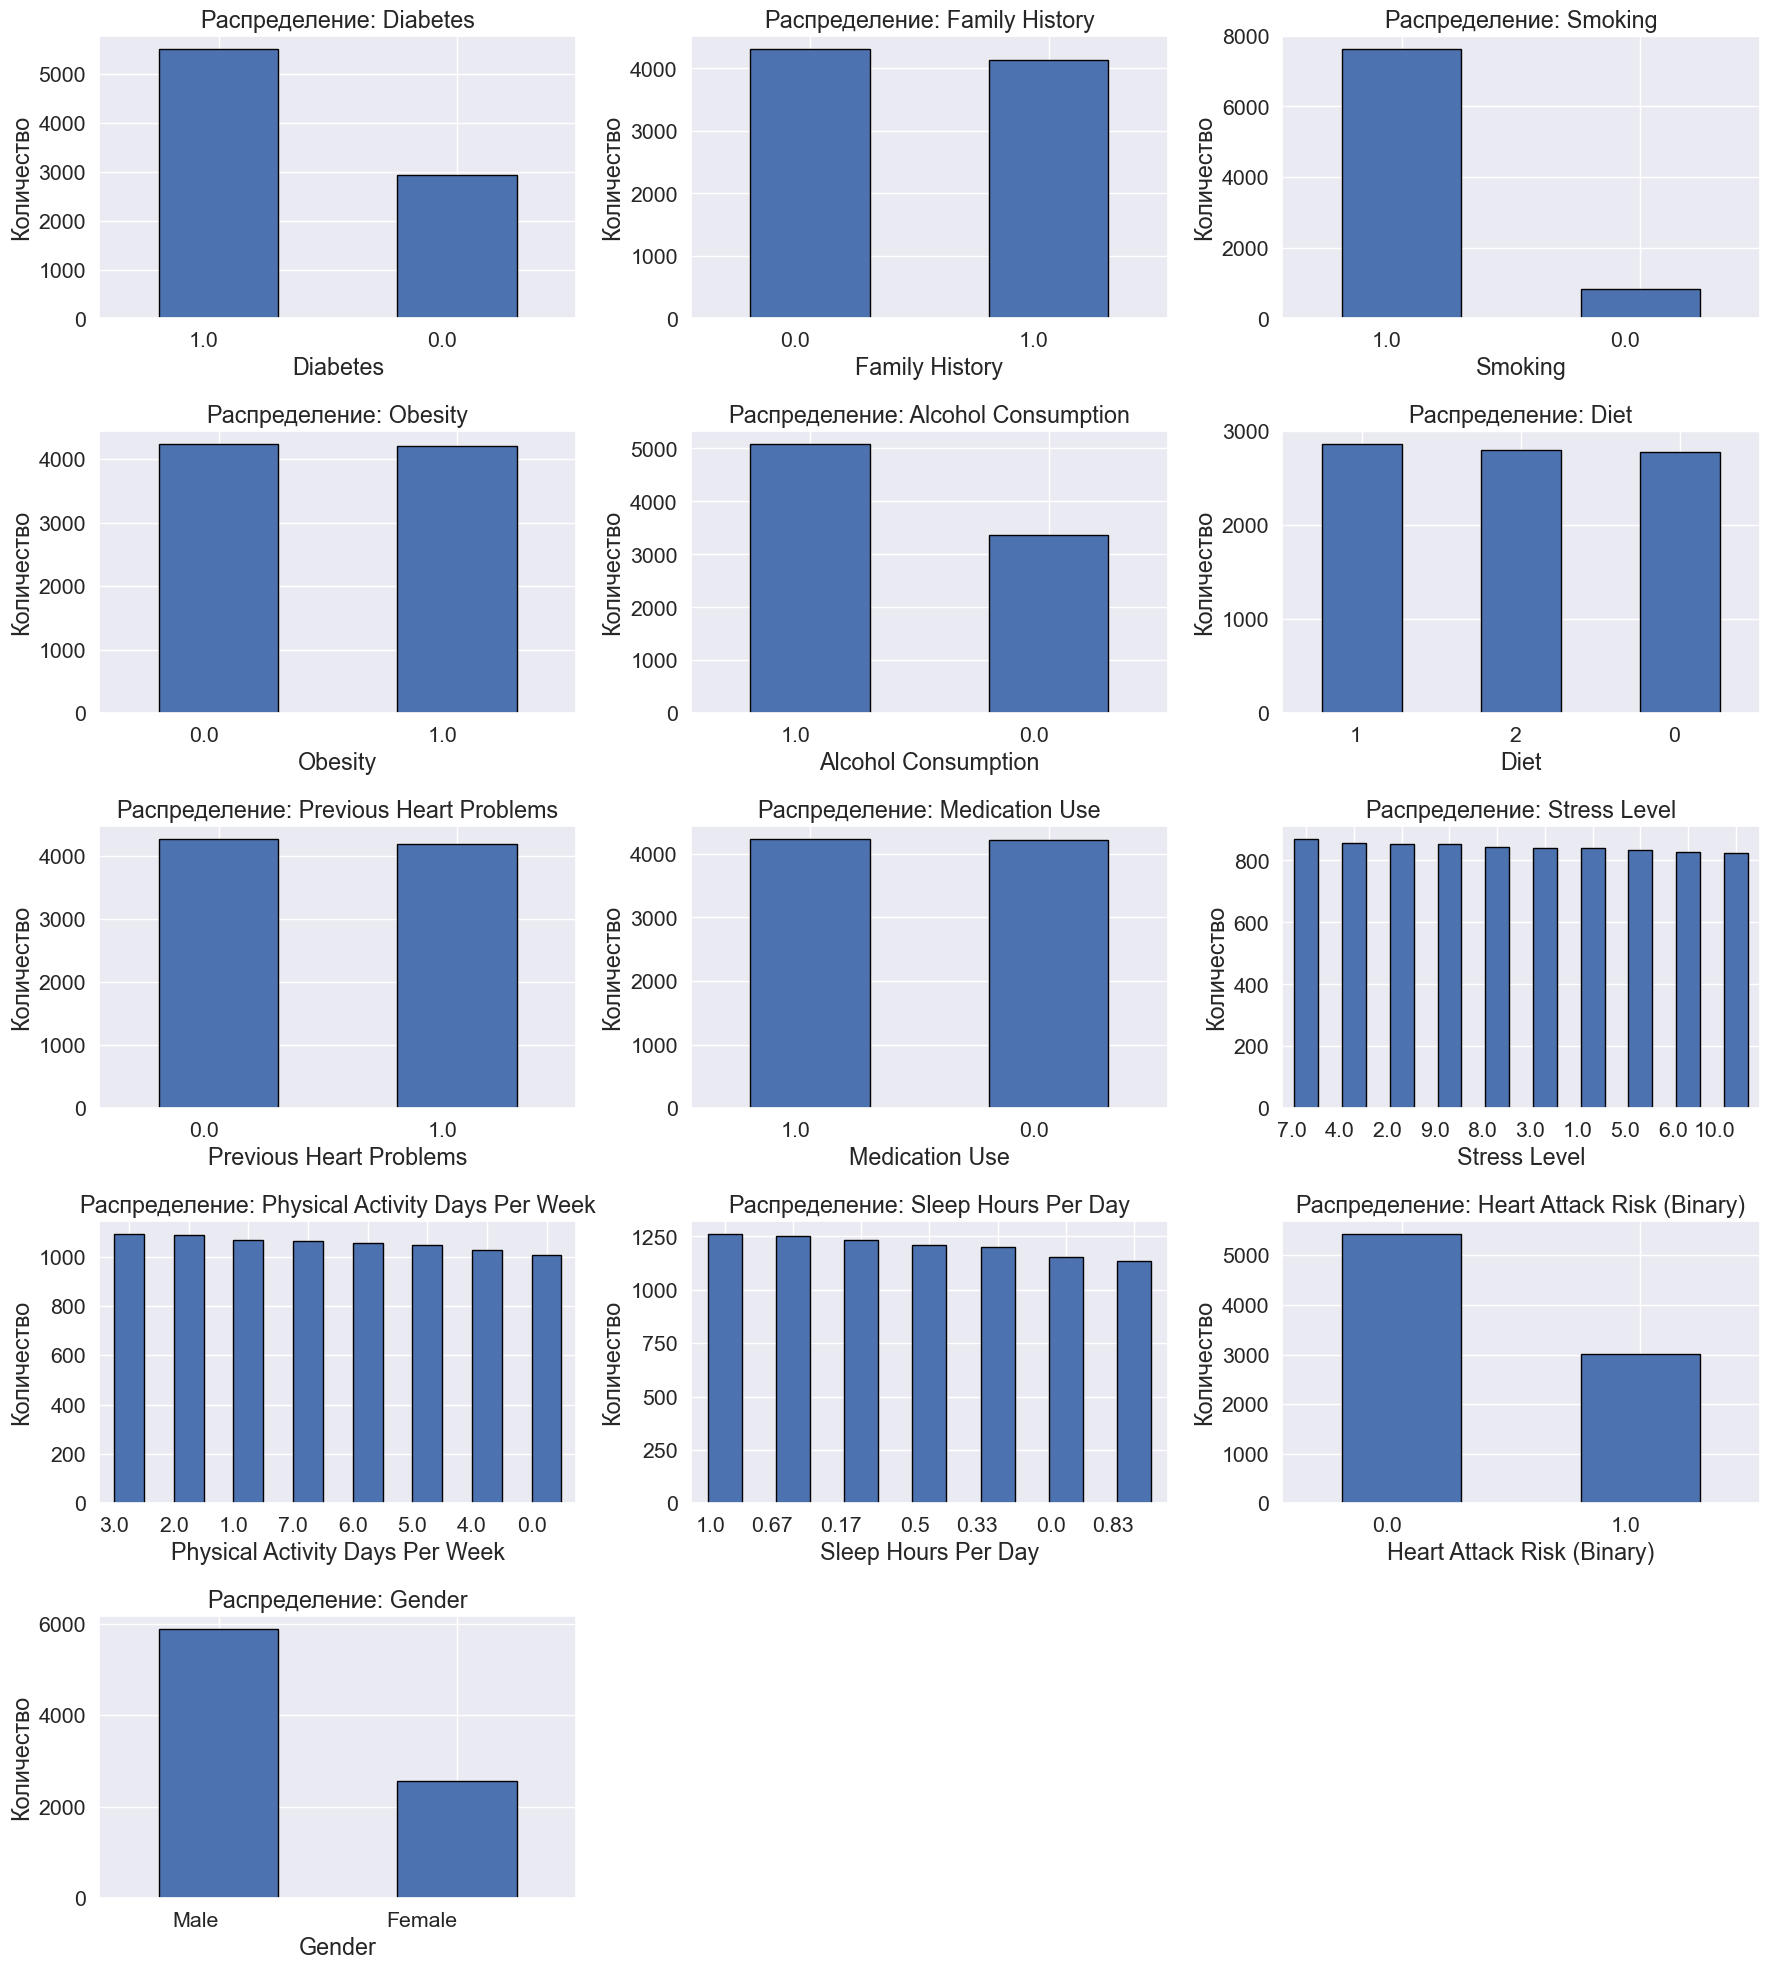

In [235]:
cat_columns = [
    'Diabetes',
    'Family History',
    'Smoking',
    'Obesity',
    'Alcohol Consumption',
    'Diet',
    'Previous Heart Problems',
    'Medication Use',
    'Stress Level',
    'Physical Activity Days Per Week',
    "Sleep Hours Per Day",
    'Heart Attack Risk (Binary)',
    'Gender'

]

plot_bars(data, cat_columns, n_cols=3)

В рассматриваемом наборе данных можно отметить следующие ключевые моменты:

* Присутствует значительная доля людей с диагнозом диабета (Diabetes).

* Приблизительно половина участников имеют наследственную предрасположенность (Family History) к сердечным заболеваниям, и половина — нет.

* Практически все участники являются курящими (Smoking).

* Количество людей с ожирением (Obesity) примерно равно количеству людей без ожирения.

* Число людей, употребляющих алкоголь (Alcohol Consumption), превышает число тех, кто его не употребляет.

* В выборке больше мужчин, чем женщин (Gender).

* Целевая переменная (Heart Attack Risk (Binary)) имеет несбалансированные классы — это означает, что модель, вероятно, покажет лучшую метрику Precision.»



### Построим матрицу корреляции

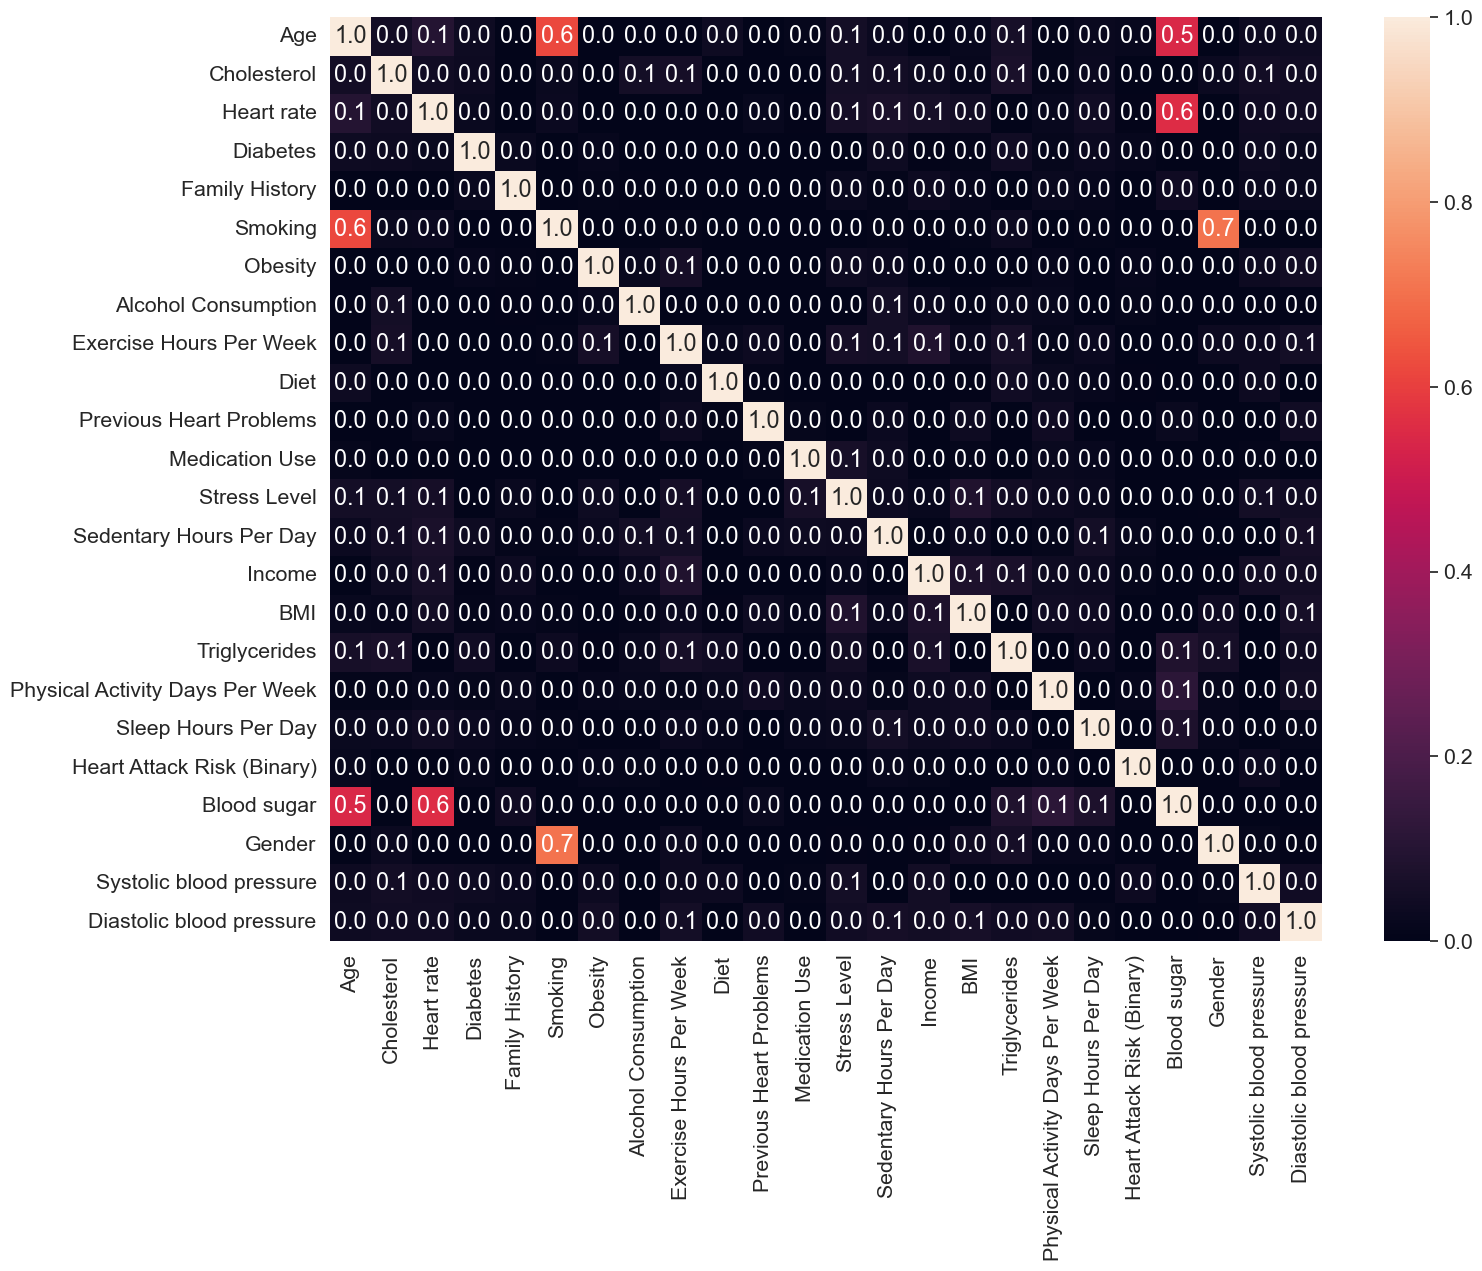

In [236]:
interval_cols = [
    "Age",
    "Cholesterol",
    "Heart rate",
    "Exercise Hours Per Week",
    "Sedentary Hours Per Day",
    "Income",
    "BMI",
    "Triglycerides",
    "Systolic blood pressure",
    "Diastolic blood pressure"
    ]

plt.figure(figsize=(16,12))
cm = phik.phik_matrix(data.drop(columns=["Unnamed: 0","id"]), interval_cols=interval_cols)
sns.heatmap(cm, annot=True, fmt=".1f")
plt.show()

* Тепловая карта корреляций показывает, что между большинством признаков практически отсутствуют сильные линейные связи. Поэтому применение простых линейных моделей, предполагающих явные линейные зависимости между переменными, может оказаться неэффективным.

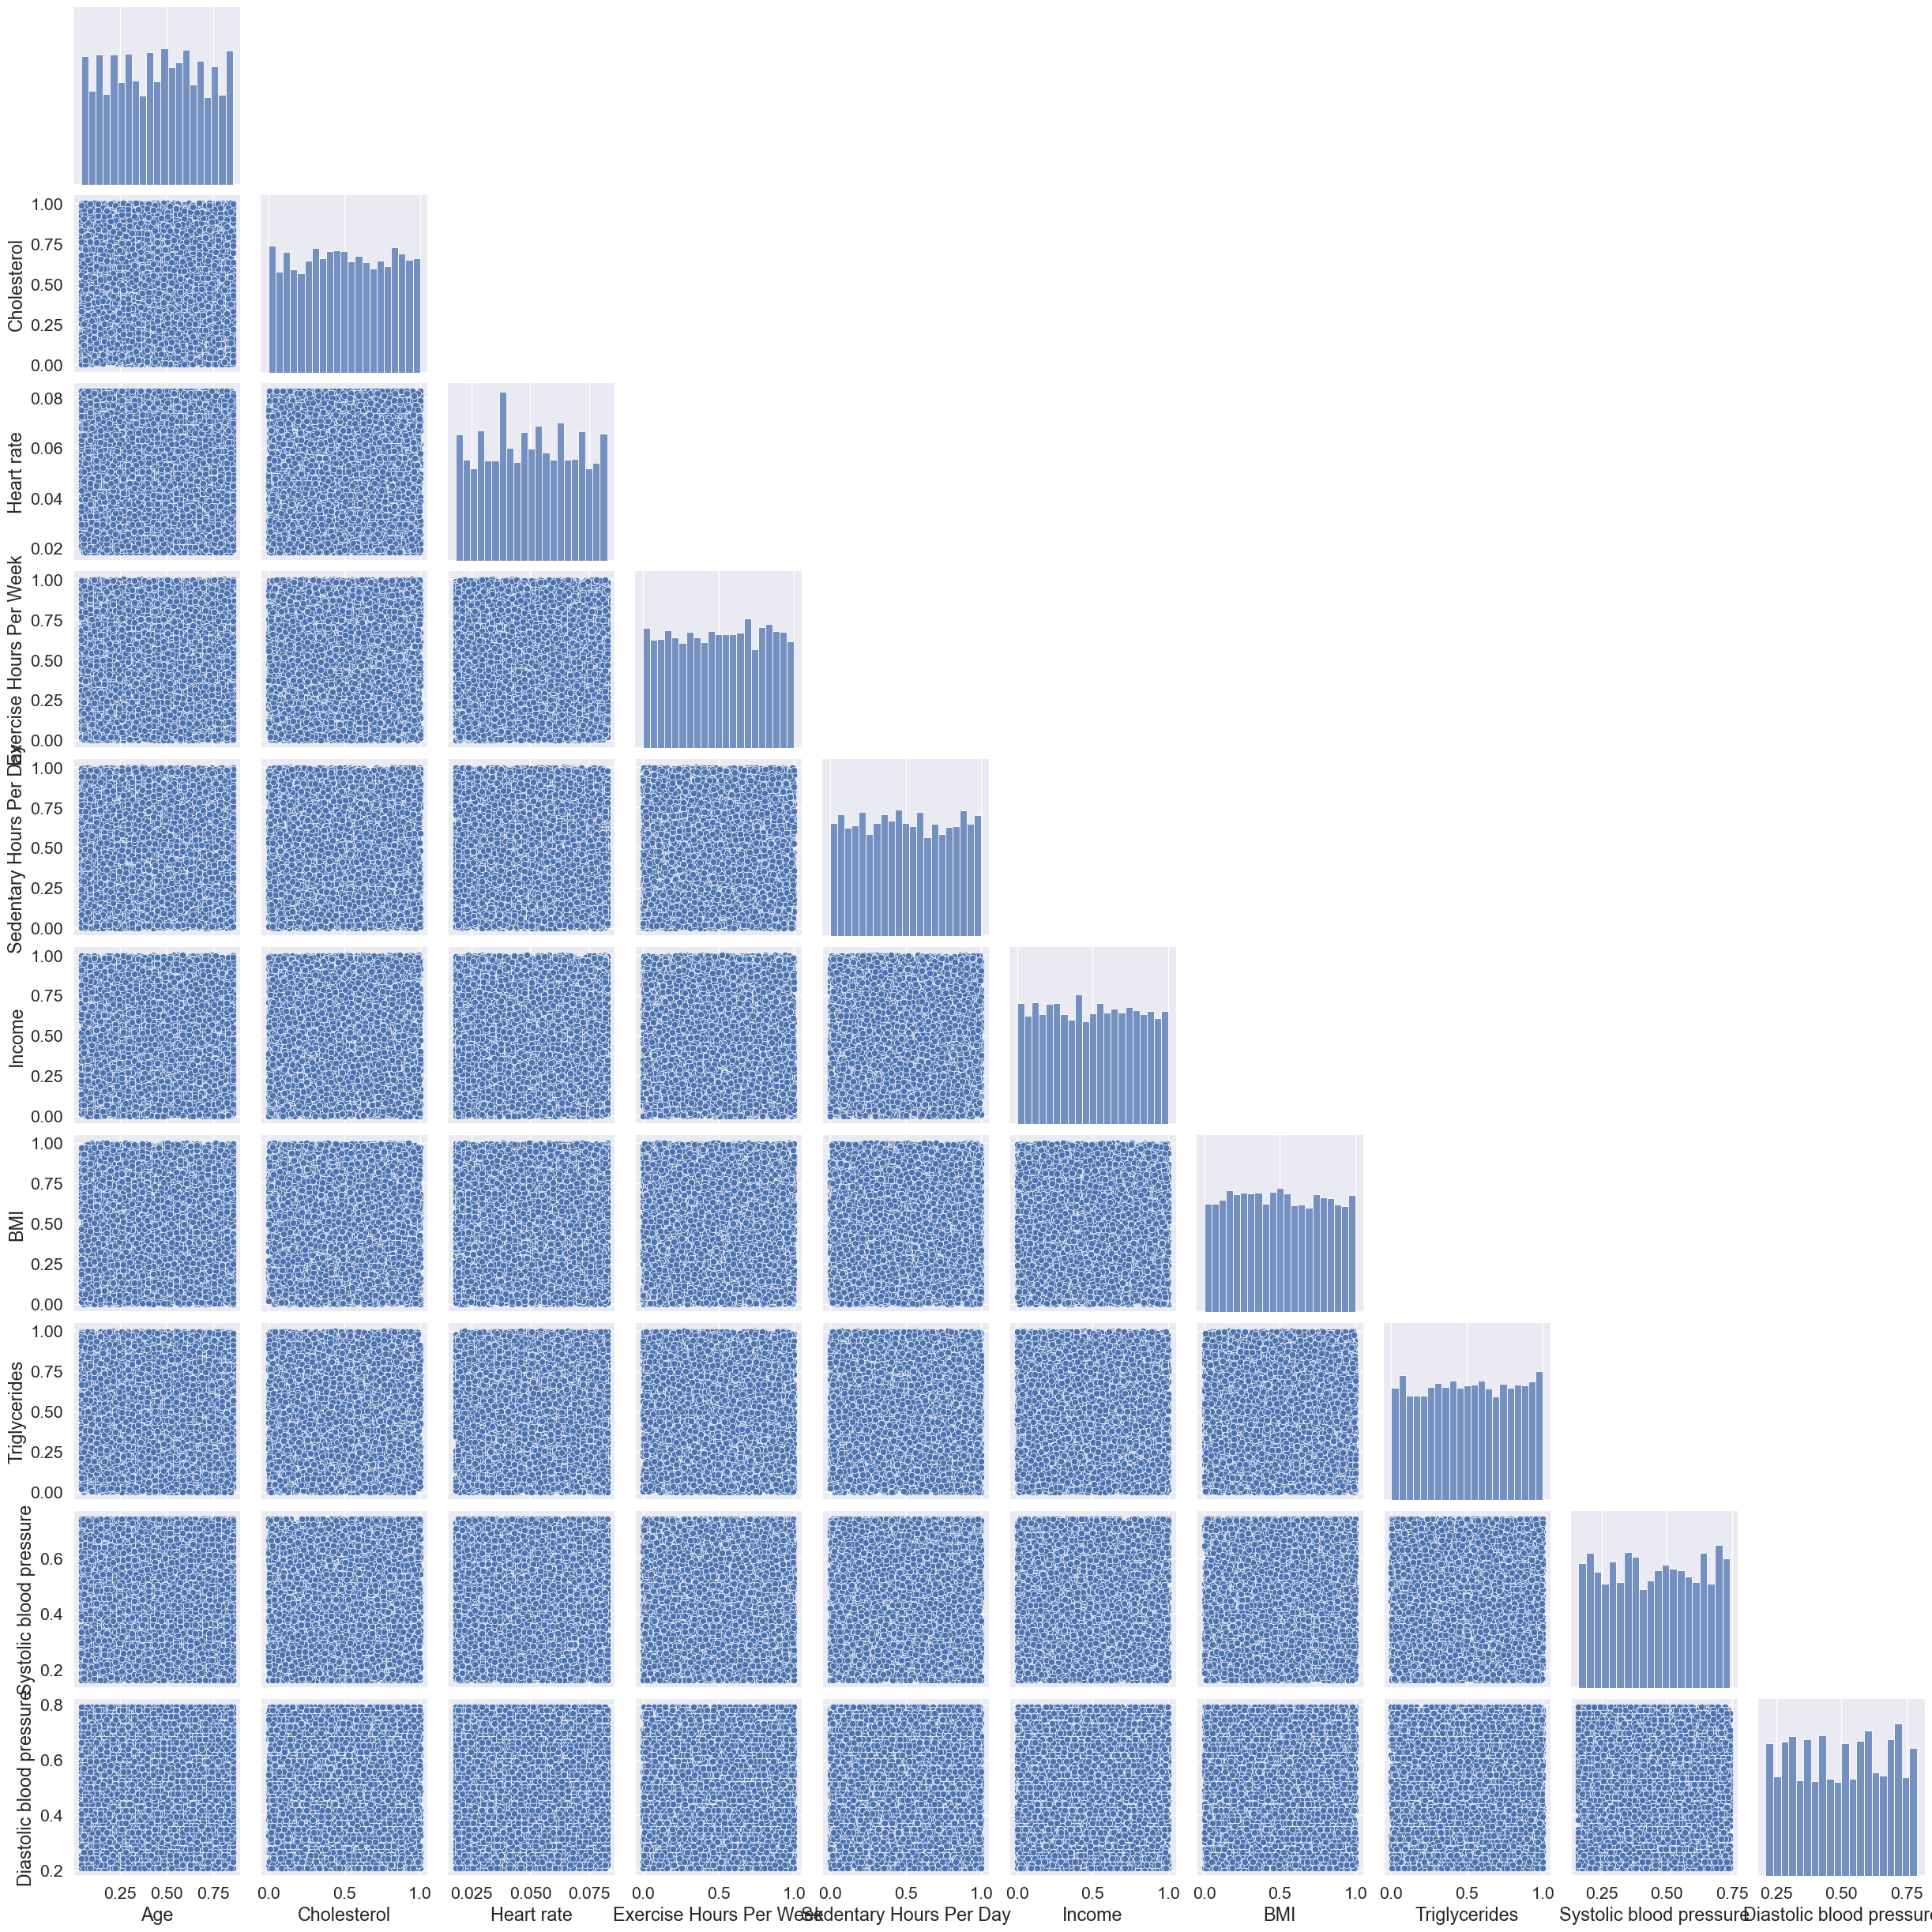

In [237]:
name_columns = [
    'Age',
    'Cholesterol',
    'Heart rate',
    'Exercise Hours Per Week',
    'Sedentary Hours Per Day',
    'Income',
    'BMI',
    'Triglycerides',
    'Systolic blood pressure',
    'Diastolic blood pressure'
    ]

sns.pairplot(data[name_columns], corner=True)
plt.show()

* Графики scatterplots поддтверждают, что между количественными переменными нету сильной корреляции

### Общий вывод:

После предварительного анализа набора данных можно сделать следующие ключевые выводы:

1) Признаки **CK-MB** и **Troponin** являются биомаркерами повреждения сердечной мышцы, они используются в клинической практике для диагностики Myocardial Infarction. Поскольку они напрямую отражают целевое событие (инфаркт), их включение в модель может привести к утечке целевого признака — поэтому их следует исключить из набора данных.

Также признак **Blood sugar** (уровень глюкозы в крови), хотя и является фактором риска сердечно-сосудистых заболеваний, может давать модели информацию, близкую к целевому событию, что повышает риск косвенной утечки. Поэтому его также разумно удалить.

2) Остальные переменные выборки имеют следующие особенности:

* Значительная доля участников имеют диагноз диабета (Diabetes).

* Примерно половина участников имеют семейную наследственность сердечных заболеваний (Family History), другая половина — нет.

* Практически все участники — курящие (Smoking).

* Приблизительно равное число участников с и без ожирения (Obesity).

* Людей, употребляющих алкоголь (Alcohol Consumption), больше, чем неупотребляющих.

* В выборке преобладают мужчины над женщинами (Gender).

* Целевая переменная (Heart Attack Risk (Binary)) представлена несбалансированно.

3) Анализ корреляций показывает, что между большинством признаков нет сильных линейных связей — тепловая карта, а также scatter-графики количественных переменных подтверждают слабую корреляцию между ними. Это означает, что применение простых линейных моделей, предполагающих сильную линейную зависимость между признаками, может быть неэффективным в данном случае.

# Составим модель машинного обучения

In [238]:
data_model = data.drop(columns=["Unnamed: 0","id"]).copy()

In [239]:
cat_cols = data_model.select_dtypes(include=["object"]).columns.tolist()
num_cols = data_model.drop(columns=["Heart Attack Risk (Binary)"]).select_dtypes(include=["number"]).columns.tolist()

ohe_cols = [
    'Diabetes',
    'Family History',
    'Smoking',
    'Obesity',
    'Alcohol Consumption',
    'Diet',
    'Previous Heart Problems',
    'Medication Use',
    'Gender'

]

#ord_cols = [
#    'Stress Level',
#    'Physical Activity Days Per Week',
#    'Sleep Hours Per Day'
#]

In [240]:
X = data_model.drop(columns=["Heart Attack Risk (Binary)"])
y = data_model["Heart Attack Risk (Binary)"]

In [241]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE,
    stratify=y
)

In [242]:
pipe_scaler = Pipeline(
    [
        (
            "imputer",
            SimpleImputer(missing_values=np.nan, strategy="median")
        ),
        (
            "scaler",
            MinMaxScaler()
        ),
        (
            "polynomial_features",
            PolynomialFeatures(degree=1,include_bias=False)
        )
    ]
)

pipe_one_hot = Pipeline(
    [
        ("imputer_before", SimpleImputer(strategy="constant", fill_value="0")),

        (
            "one_hot",
             OneHotEncoder(drop="first", handle_unknown="ignore")
        ),

        ("imputer_after", SimpleImputer(missing_values=np.nan, strategy="most_frequent"))

    ]
)

pipe_ord = Pipeline(

    [
        (
            "SimpleImputer_ord",
            SimpleImputer(missing_values=np.nan, strategy="most_frequent")
        ),
        
        (
            "OrdinalEncoder",
            OrdinalEncoder(
                categories=[
                    ["Low","Average","High"],
                    ["Little","Average","High"],
                    ["Little","Average","High"]
                ],
                handle_unknown="use_encoded_value",
                unknown_value=np.nan 
            )
        ),

        (
            "SimpleImputer_ord_2",
            SimpleImputer(missing_values=np.nan, strategy="most_frequent")
        )
    ]
)

preproces_transformer = ColumnTransformer(
    [
        ("scaler", pipe_scaler, num_cols),
        ("hot", pipe_one_hot, ohe_cols),
        #("ord", pipe_ord, ord_cols)
    ],
    remainder = "passthrough"
)

final_pipeline = ImbPipeline(
    [
        ("preprocessing",preproces_transformer),
        ("smote", SMOTE(random_state=RANDOM_STATE)),
        ("selector", RFE(
            estimator=DecisionTreeClassifier(random_state=RANDOM_STATE),
            n_features_to_select=2,
            step=1
            )),
        ("model", XGBClassifier(
            random_state=RANDOM_STATE,
            n_estimators=800,
            n_jobs=-1,
            tree_method='hist'
        ))
    ]
)

In [243]:

param_grid = [{

        "model__n_estimators":[2000],
        "model__max_depth": [11],
        "model__min_child_weight": [6],
        "model__learning_rate":[0.3],
        "model__subsample":[0.5],
        "model__colsample_bytree":[0.1],
        "model__scale_pos_weight":[1.8],
        "model__gamma":[7],
        "selector__n_features_to_select":[2]
    }
]

gs = GridSearchCV(
    final_pipeline,
    param_grid,
    n_jobs=-1,
    scoring="f1",
    cv=5
)

In [244]:
gs.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('polynomial_features',
                                                                                          PolynomialFeatures(degree=1,
                                                                                                             include_bias=False))]),
                                                                         ['Age',
                                                                          'Cholesterol',
                                                                          'Heart '
                                                                          'rate',
                                                                          'Exercise '
                                                                          'Hours '
                                                                          'Per '
                                                                          'Week...
                                                      n_estimators=800,
                                                      n_jobs=-1,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid=[{'model__colsample_bytree': [0.1], 'model__gamma': [7],
                          'model__learning_rate': [0.3],
                          'model__max_depth': [11],
                          'model__min_child_weight': [6],
                          'model__n_estimators': [2000],
                          'model__scale_pos_weight': [1.8],
                          'model__subsample': [0.5],
                          'selector__n_features_to_select': [2]}],
             scoring='f1')

In [245]:
model = gs.best_estimator_

In [246]:
gs.best_score_

np.float64(0.5156498541868746)

In [247]:
basic_statistics(y_test, gs.predict(X_test))

f1 = 0.5037707390648567
recall = 0.8871181938911022
precision = 0.35176408636124273
accuracy = 0.3765987683562293


In [248]:
c_m = confusion_matrix(y_test, gs.predict(X_test))

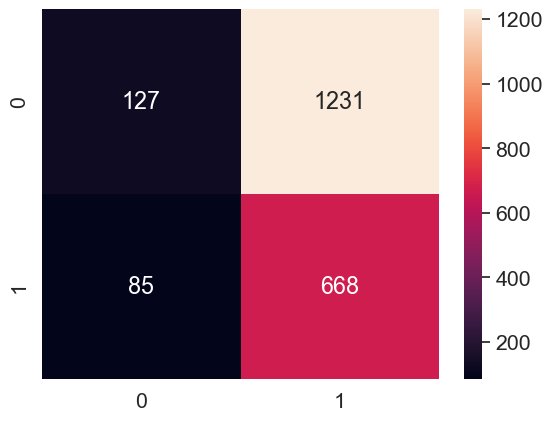

In [249]:
sns.heatmap(c_m, annot=True, fmt="")
plt.show()

* Сохраним модель

In [253]:
joblib.dump(model, "model_pipeline.pkl")

['model_pipeline.pkl']